# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import export_graphviz

In [47]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
X_ = pd.read_csv('X_train_edit.csv', index_col = [0,1])
X_.head(1)

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627


In [8]:
X_test = pd.read_csv('X_test_edit.csv', index_col = [0,1])
X_test.head(1)

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.33037,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978


In [11]:
y_ = pd.read_csv('y_train_edit.csv', index_col = [0,1])
y_.head(1)

,,0
,Subject,
0,2.0,5


In [9]:
y_test = pd.read_csv('y_test_edit.csv', index_col = [0,1])
y_test.head(1)

,,0
,Subject,
0,2,5


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=.25, random_state=100)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

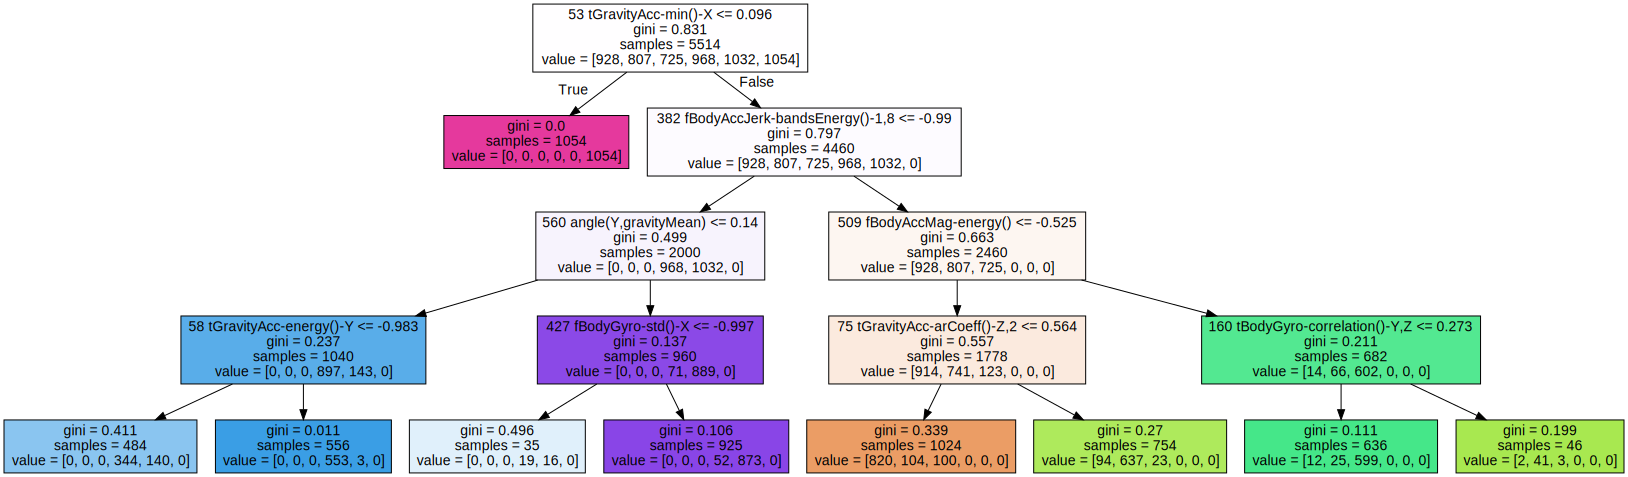

In [15]:
clf = DecisionTreeClassifier(random_state=100, max_depth = 4).fit(X_train, y_train)

dot_data = export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

In [30]:
importancia = pd.Series(clf.feature_importances_, index = X_train.columns)
importancia.sort_values(ascending = False, inplace = True)
importancia.head(3)

53 tGravityAcc-min()-X                0.282630
382 fBodyAccJerk-bandsEnergy()-1,8    0.254515
560 angle(Y,gravityMean)              0.171064
dtype: float64

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [31]:
X_train_cut = X_train[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','560 angle(Y,gravityMean)']]
X_valid_cut = X_valid[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','560 angle(Y,gravityMean)']]
X_test_cut = X_test[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','560 angle(Y,gravityMean)']]

In [32]:
clf = DecisionTreeClassifier(random_state=100, min_samples_leaf = 20).fit(X_train, y_train)

In [33]:
path = DecisionTreeClassifier(random_state=100, min_samples_leaf = 20).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.00000000e+00, 1.21895384e-05, 1.75553137e-05, 6.98756107e-05,
       8.53267688e-05, 1.08075874e-04, 1.32841758e-04, 1.50147949e-04,
       1.57349637e-04, 1.80068653e-04, 1.82567110e-04, 1.94761161e-04,
       2.04427670e-04, 2.96904683e-04, 3.63560193e-04, 3.77875690e-04,
       4.26779020e-04, 4.91090576e-04, 6.99769687e-04, 1.13063329e-03,
       1.16283359e-03, 1.36881926e-03, 1.38579490e-03, 1.54122765e-03,
       1.65162690e-03, 1.78003485e-03, 1.95468283e-03, 2.02148698e-03,
       2.41239551e-03, 2.57489023e-03, 2.69265088e-03, 2.89680352e-03,
       3.10397946e-03, 3.15799543e-03, 3.23748256e-03, 4.00127048e-03,
       5.63410535e-03, 6.92561886e-03, 8.03924955e-03, 8.55546742e-03,
       1.16302269e-02, 1.20271418e-02, 1.94957720e-02, 7.98629614e-02,
       9.00906360e-02, 1.12586704e-01, 1.67509884e-01, 1.86014110e-01])

In [34]:
ccp_alphas = ccp_alphas[::3]
ccp_alphas

array([0.00000000e+00, 6.98756107e-05, 1.32841758e-04, 1.80068653e-04,
       2.04427670e-04, 3.77875690e-04, 6.99769687e-04, 1.36881926e-03,
       1.65162690e-03, 2.02148698e-03, 2.69265088e-03, 3.15799543e-03,
       5.63410535e-03, 8.55546742e-03, 1.94957720e-02, 1.12586704e-01])

In [35]:
%%time

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=100, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

Wall time: 38.8 s


In [36]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]

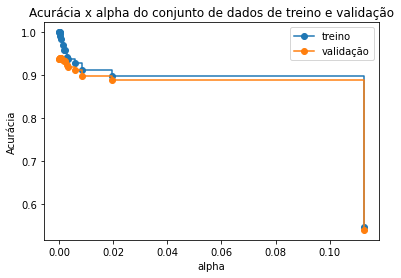

In [37]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [39]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]
melhor_arvore

DecisionTreeClassifier(ccp_alpha=0.0003778756904927556, random_state=100)

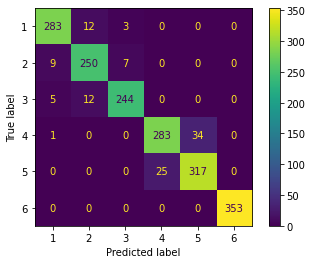

In [48]:
plot_confusion_matrix(melhor_arvore, X_valid, y_valid);

In [46]:
acuracia_valid = melhor_arvore.score(X_valid, y_valid)

print(f'Acurácia: {acuracia_valid*100:.2f}')

Acurácia: 94.12


### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia: 87.00


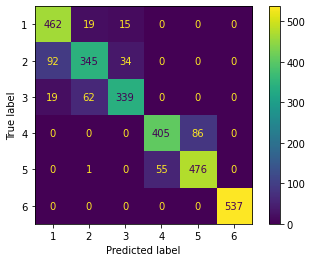

In [49]:
acuracia_teste = melhor_arvore.score(X_test, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
plot_confusion_matrix(melhor_arvore, X_test, y_test);